In [273]:
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from collections import Counter
import math
import numpy as np

### Linear Congruential Generator

De Linear Congruential Generator (LCG) is een van de bekendste Pseudo Random Number Generators en gebruikt een simpele formule om pseudo random getallen te genereren. De kwaliteit van de LCG is heel erg afhankelijk van de setup parameters. Over het algemeen geldt; hoe groter de setup parameters, hoe beter de LCG werkt. Vooral de modulus heeft veel effect op hoe snel het 'random' patroon zich herhaalt. Maar ook op hoe groot de random getallen kunnen worden. Om een getal tussen de 0 en 1 te genereren wordt de seed (het nieuwe random getal) steeds door de modulus gedeeld.

In [274]:
class lcg():

    def __init__(self, seed, multiplier, increment, modulus):
        self.seed = seed
        self.multiplier = multiplier
        self.increment = increment
        self.modulus = modulus

    def random(self):
        self.seed = (self.seed * self.multiplier + self.increment) % self.modulus
        return self.seed / self.modulus

    def n_random(self, n):
        return [self.random() for _ in range(n)]

In [275]:
#prng = lcg(seed=54321, multiplier=214013, increment=2531011, modulus=2**32) # Microsoft Visual/Quick C/C++
prng = lcg(seed=54321, multiplier=48271, increment=0, modulus=2**31 - 1) # C++11's minstd_rand

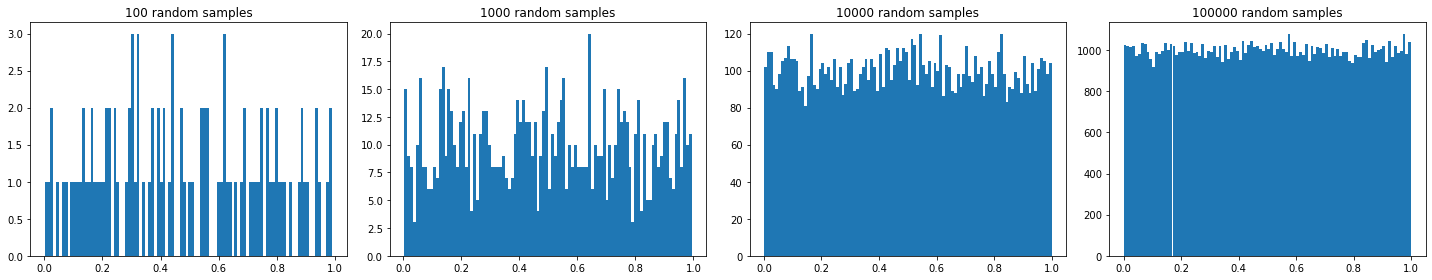

In [276]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
for col, n in enumerate([100, 1000, 10000, 100000]):
    axes[col].set_title(f"{n} random samples")
    axes[col].hist(prng.n_random(n), bins=100)
plt.tight_layout()
plt.show()

### Pseudo Random Number Generator testen

Ik test de LCG i.c.m. gekozen parameters met behulp van de chisquare methode (https://en.wikipedia.org/wiki/Chi-squared_test). De chisquare test meet of er een significant verschil zit tussen het verwachte voorkomen van getallen en het daadwerkelijke voorkomen van getallen. In het geval van de LCG die is geimplementeerd als een uniforme pseudo RNG, wordt gemeten of er daadwerkelijk een uniforme verdeling/voorkomen van getallen is. Door de frequentie van getallen in een lijst te tellen kan bepaald worden in hoeverre de gewenste verdeling klopt.

De chisquare methode zit ingebouwd in de softwarebibliotheek van Scipy stats (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html). Zonder op te geven welke voorkomens/frequencies worden verwacht voor een bepaalde category wordt standaard de test voor een uniforme verdeling uitgevoerd.

De meetwaarde van de chisquare test is de p-waarde. Hoe lager de p-waarde, hoe groter het significante verschil. Bij een p-waarde van 1 zijn alle categorien gelijk verdeeld. De alpha waarde is waar de p-waarde minimaal aan moet voldoen. Bij een p-waarde van hoger dan alpha kan de hypothese dat de LCG random getallen genereert aangenomen worden.

Omdat mijn LCG een float genereert tussen 0 en 1 met veel decimale getallen wordt elk getal afgerond op 1 decimaal zodat de frequenties geteld kunnen worden voor een interval van 0.1.

In [283]:
prng = lcg(seed=54321, multiplier=48271, increment=0, modulus=2**31 - 1) # C++11's minstd_rand
randoms = prng.n_random(1000000)
buckets = [math.floor(i * 10) / 10 for i in randoms]
unique_counts = list(Counter(buckets).values())
print(unique_counts)
print(chisquare(unique_counts))

[100049, 100299, 99568, 99733, 100175, 100501, 99917, 99841, 99994, 99923]
Power_divergenceResult(statistic=6.694759999999999, pvalue=0.6688649233180123)


### PI benaderen

In [278]:
def approximate_pi(prng, random_numbers=10000):
    count = 0
    for _ in range(random_numbers):
        x = prng.random()
        y = prng.random()
        r = (x**2 + y**2) ** 0.5
        if r < 1:
            count += 1
    return 4 * count / random_numbers

In [279]:
prng = lcg(seed=54321, multiplier=48271, increment=0, modulus=2**31 - 1) # C++11's minstd_rand
print(approximate_pi(prng, random_numbers=500000))

3.1436
